# Lista 2 - Física Computacional I
Aluna: Ylana Karolina Santos Lopes

In [1]:
from numpy import exp, pi, cos, sin, arange, linspace, loadtxt, empty, sqrt
from pylab import plot, xlabel, ylabel, imshow, xlim, ylim, gray, show

10.626780134766634


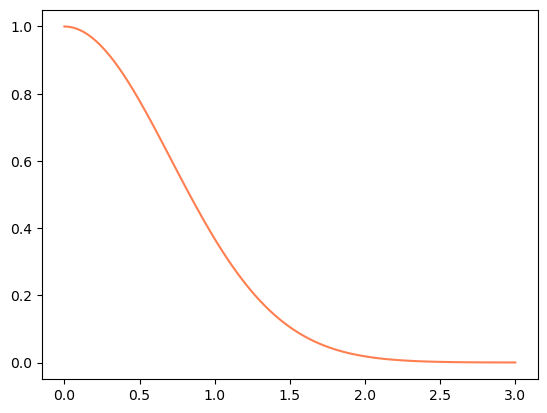

In [9]:
## Problema 1
# a) Por método de Simpsom:
def E(t):
    return exp(-t**2)

a = 0
b = 3
N = 10

h = (b-a)/N

soma_imp = 0
soma_par = 0

for k in arange(1,N,0.1): 
    soma_imp += E(a + k*h)

    
soma_imp = soma_imp*4
    
    
for k in arange(2,N,0.1):
    soma_par += E(a + k*h)
    

soma_par = soma_par*2


integral = (h/3)*(E(a) + E(b) + soma_par + soma_imp)


print(integral)

# b) 

x = linspace(0,3,100)

plot(x, E(x), color = 'coral')


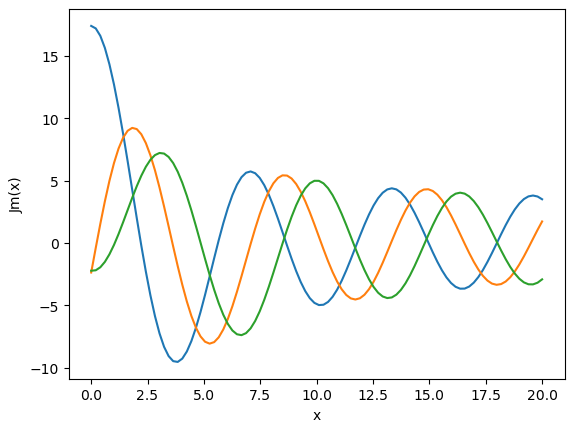

In [10]:
## Problema 2
## a) 
def j(m,x):
    def f(y):
        return cos(m*y - x*sin(y))
    
    a = 0
    b = pi
    N = 1000

    h = (b-a)/N

    soma_imp = 0
    soma_par = 0

    for k in arange(1,N,0.1): #mudar a função p comport float
        soma_imp += f(a + k*h)


    soma_imp = soma_imp*4


    for k in arange(2,N,0.1):
        soma_par += f(a + k*h)


    soma_par = soma_par*2


    integral = (h/3)*(f(a) + f(b) + soma_par + soma_imp)
    bess = (1/pi)*integral
    
    return bess

xlabel('x')
ylabel('Jm(x)')

x = linspace(0,20,100)

plot(x, j(0,x))
plot(x, j(1,x))
plot(x, j(2,x))



In [32]:
## b) 
wavelenth = 500e-9
k = (2*pi)/wavelenth


def i(r):
    def j(m,x):
        def f(y):
            return cos(m*y - x*sin(y))

        a = 0
        b = pi
        N = 1000

        h = (b-a)/N

        soma_imp = 0
        soma_par = 0

        for k in arange(1,N,0.1):
            soma_imp += f(a + k*h)


        soma_imp = soma_imp*4


        for k in arange(2,N,0.1):
            soma_par += f(a + k*h)


        soma_par = soma_par*2


        integral = (h/3)*(f(a) + f(b) + soma_par + soma_imp)
        bess = (1/pi)*integral

        return bess

    
    
    if r == 0:
        return 1/2
    
    else:
        return (j(1, k*r)/(k*r))**2



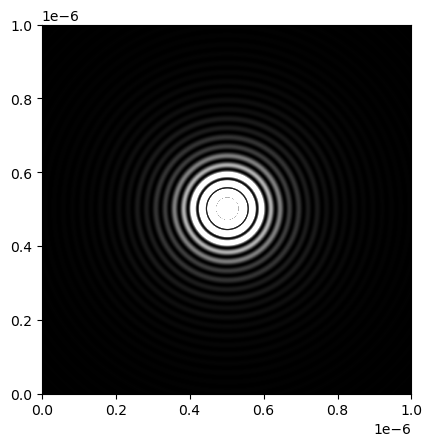

In [49]:
wavelenth = 5e-8
k = (2*pi)/wavelenth
xi0 = 1
side = 1e-6
points = 500
spacing = side/points

x1 = side/2
y1 = side/2

xi = empty([points, points], float)

for a in range(points):
    y = spacing*a
    for j in range(points):
        x=spacing*j
        r = sqrt((x-x1)**2+(y-y1)**2)
        xi[a,j] = xi0*i(r)
        
        

gray()                                                                
imshow(xi, vmax = 0.1, extent = [0, side, 0 , side])         

In [62]:
## problema 3
def f(x):                    ## calcula int por regra do trapézio
    return x**4 - 2*x +1

a = 0
b = 2
N = 20

h = (b-a)/N
soma = (f(a)+f(b))/2
for k in range(1,N):
    soma = soma + f(a+k*h)

I1 = h*soma
print("Valor da integral: ",I1)

## estimativa do erro
soma = 0
N = 10
h = (b-a)/N
soma = (f(a)+f(b))/2
for k in range(1,N):
    soma = soma + f(a+k*h)
    
    
I2 = h*soma

e1 = I1 - 4.4
e2 = (I2 - I1)*(1/3)

print("erro eqc. =", e2)
print("erro direto =", e1)


## Não concordam perfeitamente por haver a imprecisão do calculo da integral no python.

Valor da integral:  4.426660000000001
erro eqc. = 0.026633333333333137
erro direto = 0.026660000000000572


In [73]:
### problema 4
def f(x):
    return (sin(sqrt(100*x)))**2
    
a = 0
b = 1
N = 1
e = 1

h=(b - a)/N
soma = (f(a)+f(b))/2
for k in range(1,N):
    soma= soma + f(a+k*h)
    
i1 = soma*h


while abs(e) > 10e-6:
    N = N*2
    
    h=(b - a)/N
    soma = (f(a)+f(b))/2
    for k in range(1,N):
        soma= soma + f(a+k*h)
    
    i2 = soma*h
    e = (i2 - i1)/3
    
    print(N)
    print(e)
    print(i2)

    i1 = i2
    


2
0.05908414108660753
0.3252319078064746
4
0.06235031430561896
0.5122828507233315
8
-0.036428467415027734
0.40299744847824825
16
0.009035306938832902
0.43010336929474696
32
0.00610376549757428
0.4484146657874698
64
0.0018327551426353672
0.4539129312153759
128
0.000478524385808717
0.45534850437280205
256
0.00012092069347964991
0.455711266453241
512
3.0311066141097687e-05
0.4558021996516643
1024
7.582826918576628e-06
0.45582494813242
